# NOT WORKING AT THE MOMENT

In [ ]:
import os

from nilearn import plotting

bids_path = "/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2"
backup_folder = "/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/sourcedata/bidsonym"
sub_id = "01"

In [7]:
bidsonym_cmd = f"docker run --rm \
    -v {bids_path}:/bids_dataset \
    peerherholz/bidsonym /bids_dataset participant \
    --participant_label {sub_id} \
    --deid pydeface \
    --brainextraction bet \
    --bet_frac 0.5 \
    --skip_bids_validation"

In [8]:
# run the command
os.system(bidsonym_cmd)

Some packages in this Docker container are non-free
If you are considering commercial use of this container, please consult the relevant license:
https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Licence
Input data will not be checked for BIDS compliance.
Found the following session(s) for participant 01:
['01']
250714-15:00:51,185 nipype.workflow INFO:
	 Workflow brainextraction_wf settings: ['check', 'execution', 'logging', 'monitoring']
250714-15:00:51,195 nipype.workflow INFO:
	 Running serially.
250714-15:00:51,197 nipype.workflow INFO:
	 [Node] Setting-up "brainextraction_wf.bet" in "/tmp/tmp5v9i67lv/brainextraction_wf/bet".
250714-15:00:51,204 nipype.workflow INFO:
	 [Node] Executing "bet" <nipype.interfaces.fsl.preprocess.BET>
250714-15:00:55,655 nipype.workflow INFO:
	 [Node] Finished "bet", elapsed time 4.429311s.
the following meta-data files will be checked:
/bids_dataset/participants.json
/bids_dataset/dataset_description.json
/bids_dataset/sub-01/ses-01/anat/sub-01_ses-01_T1w.json
/

/opt/miniconda-latest/envs/bidsonym/lib/python3.10/site-packages/pydeface/__main__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import require


--------------
pydeface 2.0.2
--------------
Temporary files:
  /tmp/tmp0rg8x4tw.mat
  /tmp/tmpxhoo9x8p.nii.gz
Defacing...
  /bids_dataset/sourcedata/bidsonym/sub-01/ses-01/sub-01_ses-01_T1w.nii.gz
Defaced image saved as:
  /bids_dataset/sub-01/ses-01/anat/sub-01_ses-01_T1w.nii.gz
Cleaning up...
Finished.
250714-15:05:18,528 nipype.workflow INFO:
	 [Node] Finished "pydeface", elapsed time 262.658411s.
250714-15:05:18,560 nipype.workflow INFO:
	 Workflow report_wf settings: ['check', 'execution', 'logging', 'monitoring']
250714-15:05:18,564 nipype.workflow INFO:
	 Running serially.
250714-15:05:18,565 nipype.workflow INFO:
	 [Node] Setting-up "report_wf.plt_defaced" in "/tmp/tmpsuql_n4r/report_wf/plt_defaced".
250714-15:05:18,568 nipype.workflow INFO:
	 [Node] Executing "plt_defaced" <nipype.interfaces.utility.wrappers.Function>
250714-15:05:18,570 nipype.workflow INFO:
	 [Node] Finished "plt_defaced", elapsed time 0.001066s.
250714-15:05:18,570 nipype.workflow WARNING:
	 Storing result

Traceback (most recent call last):
  File "/opt/miniconda-latest/envs/bidsonym/bin/bidsonym", line 8, in <module>
    sys.exit(run_deeid())
  File "/home/bm/bidsonym/run_deeid.py", line 387, in run_deeid
    create_graphics(args.bids_dir, subject_label, session=None,
  File "/home/bm/bidsonym/reports.py", line 201, in create_graphics
    report_wf.run()
  File "/opt/miniconda-latest/envs/bidsonym/lib/python3.10/site-packages/nipype/pipeline/engine/workflows.py", line 625, in run
    runner.run(execgraph, updatehash=updatehash, config=self.config)
  File "/opt/miniconda-latest/envs/bidsonym/lib/python3.10/site-packages/nipype/pipeline/plugins/linear.py", line 80, in run
    raise error from cause
  File "/opt/miniconda-latest/envs/bidsonym/lib/python3.10/site-packages/nipype/pipeline/plugins/linear.py", line 45, in run
    node.run(updatehash=updatehash)
  File "/opt/miniconda-latest/envs/bidsonym/lib/python3.10/site-packages/nipype/pipeline/engine/nodes.py", line 525, in run
    result

256

## Check output

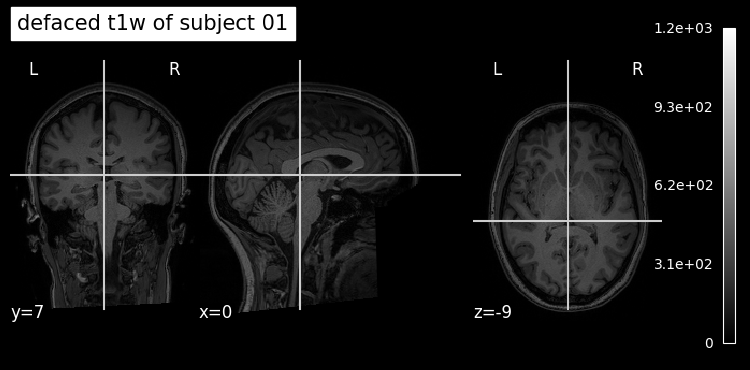

In [5]:
t1w_defaced = f"{bids_path}/sub-{sub_id}/ses-01/anat/sub-{sub_id}_ses-01_T1w.nii.gz"

plotting.plot_anat(t1w_defaced, title=f"defaced t1w of subject {sub_id}")

## Deface T2w
There is curently a bug in bidsonym that fails to identify the T2w image. This is a workaround.

In [8]:
# change folder permissions (manually)
f"sudo chmod -R g+rwx {backup_folder}/sub-{sub_id}"

'sudo chmod -R g+rwx /DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/sourcedata/bidsonym/sub-01'

In [10]:
# backup the original T2w image
os.system(f"cp {bids_path}/sub-{sub_id}/ses-01/anat/sub-{sub_id}_ses-01_T2w.nii.gz {backup_folder}/sub-{sub_id}/sub-{sub_id}_T2w.nii.gz")

0

In [11]:
# use the defaced T1w image as the mask for the T2w
t2w = f"{bids_path}/sub-{sub_id}/ses-01/anat/sub-{sub_id}_ses-01_T2w.nii.gz"

# use fslmaths to apply the mask
fslmaths_cmd = f"fslmaths {t2w} -mas {t1w_defaced} {t2w}"

os.system(fslmaths_cmd)


          Will use voxel-based orientation which is probably incorrect - *PLEASE CHECK*!

Image Exception : #3 :: Attempted to multiply images of different sizes
terminate called after throwing an instance of 'std::runtime_error'
  what():  Attempted to multiply images of different sizes
Aborted (core dumped)


34304

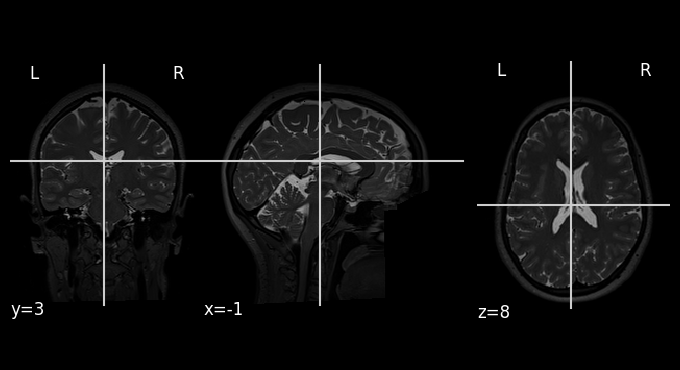

In [42]:
# view image using nilearn
plotting.plot_anat(t2w)

# Trim JSONs
Remove these fields: InstitutionName, InstitutionalDepartmentName, InstitutionAddress, DeviceSerialNumber, StationName

In [ ]:
# search all jsons inside bids folder into a list
jsons = []
for root, dirs, files in os.walk(bids_path):
    # exclude derivatives folder
    if "derivatives" not in root:
        for file in files:
            if file.endswith(".json") and file.startswith("sub-"):
                jsons.append(os.path.join(root, file))

jsons


['/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-16/anat/sub-16_T1w.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-16/anat/sub-16_T2w.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-16/fmap/sub-16_magnitude2.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-16/fmap/sub-16_phasediff.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-16/fmap/sub-16_magnitude1.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-16/func/sub-16_task-loc_run-1_bold.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-16/func/sub-16_task-sham_run-2_bold.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-16/func/sub-16_task-sham_run-1_bold.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-16/func/sub-16_task-nf_run-1_bold.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-16/func/sub-16_task-nf_run-2_bold.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-05/func/sub-05_task-loc_run-1_bold.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-05/func/sub-05_task-sham_run-2_bold.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/sub-05/func/sub-05_task-nf_run-1_bold.json',
 '/DATAPOOL/MUSICNF/BIDS-MUSICNF/

In [ ]:
# open each json file and remove the followings field if they exist: InstitutionName, InstitutionalDepartmentName, InstitutionAddress, DeviceSerialNumber, StationName
import json

for json_file in jsons:
    with open(json_file, "r") as f:
        data = json.load(f)

    if "InstitutionName" in data:
        del data["InstitutionName"]
    if "InstitutionalDepartmentName" in data:
        del data["InstitutionalDepartmentName"]
    if "InstitutionAddress" in data:
        del data["InstitutionAddress"]
    if "DeviceSerialNumber" in data:
        del data["DeviceSerialNumber"]
    if "StationName" in data:
        del data["StationName"]

    with open(json_file, "w") as f:
        json.dump(data, f, indent=4)